In [76]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [77]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [78]:
len(X_train)

60000

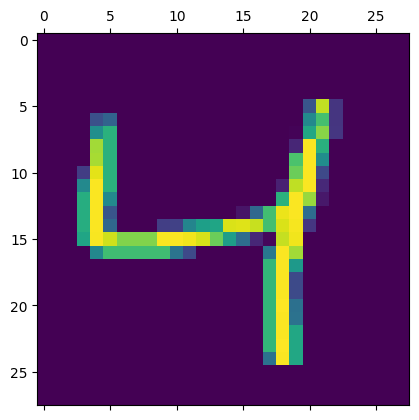

In [79]:
plt.matshow(X_train[2])

In [80]:
Y_train[1]

0

In [81]:
X_train.shape

(60000, 28, 28)

In [82]:
X_train = X_train / 255
X_test = X_test / 255

In [83]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

Creating a simple neural network

In [84]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5


c:\Users\subod\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.8232 - loss: 0.6970
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.9137 - loss: 0.3125
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - accuracy: 0.9220 - loss: 0.2831
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.9226 - loss: 0.2744
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.9263 - loss: 0.2632


**keras.sequential()**: The Sequential class is used to create a linear stack of layers, where you can add one layer at a time in a sequential manner. 

In [85]:
model.evaluate(X_test_flattened, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.9131 - loss: 0.3082


[0.2718833386898041, 0.925000011920929]

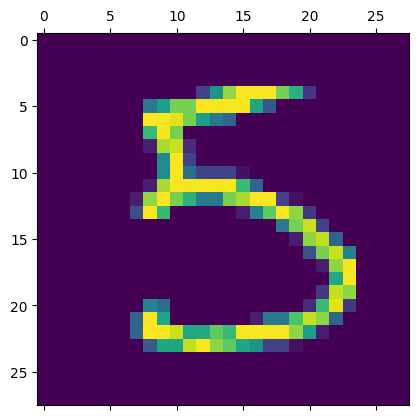

In [86]:
plt.matshow(X_test[15])

In [87]:
predict_test = model.predict(X_test_flattened)
predict_test[15]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


array([4.0482804e-02, 1.1346817e-03, 1.3682408e-02, 7.2404075e-01,
       2.7914525e-03, 9.7327757e-01, 3.4726553e-03, 4.7814199e-05,
       6.8292373e-01, 2.4275514e-04], dtype=float32)

In [88]:
np.argmax(predict_test[15])

5

In [92]:
predicted_labels = [np.argmax(i) for i in predict_test]
predicted_labels[:5]

[7, 2, 1, 0, 4]

In [93]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [95]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    4,    1,    0,    1,    4,    2,    5,    0],
       [   9,    9,  941,   15,    7,    1,   13,    8,   24,    5],
       [   4,    0,   25,  924,    1,   22,    2,    9,   11,   12],
       [   2,    2,    3,    1,  909,    0,   11,    4,    8,   42],
       [  12,    3,    4,   35,    8,  771,   18,    7,   26,    8],
       [  15,    3,    6,    1,    7,    9,  915,    2,    0,    0],
       [   2,    9,   25,    6,    9,    0,    0,  935,    1,   41],
       [  11,   12,   11,   30,    9,   31,   11,    9,  837,   13],
       [  12,    7,    1,   10,   22,    4,    0,   13,    4,  936]])>

Text(95.72222222222221, 0.5, 'Truth')

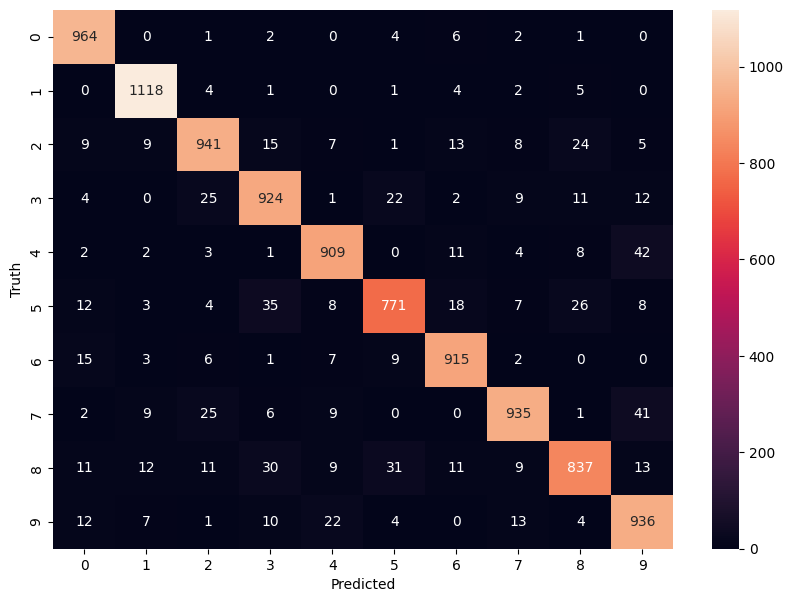

In [96]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=5)
